## This is the jupyter script to make lidar-projection-images and annotation-overlay-image

In [3]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
sys.path.append(os.path.abspath('../'))

In [5]:
from utils.lidar_process import open_lidar

In [6]:
points_set, camera_coord = open_lidar(
     '../test_images/test_1_lidar.pkl',
     4, 4, lidar_mean=[0, 0, 0], lidar_std=[1, 1, 1])

In [426]:
camera_coord

array([[  0, 131],
       [  2, 131],
       [  3, 131],
       ...,
       [363, 317],
       [379, 317],
       [396, 319]], dtype=uint16)

In [427]:
points_set

array([[ 1.60240383e+01,  3.56174755e+00,  3.61115570e+01],
       [ 1.59368982e+01,  3.56147623e+00,  3.61388016e+01],
       [ 1.33477545e+01,  3.34380817e+00,  3.06826172e+01],
       ...,
       [-1.64152133e+00, -1.78593323e-02,  8.10903740e+00],
       [-1.84526837e+00, -2.39499956e-02,  8.08366489e+00],
       [-2.03485608e+00, -1.71007328e-02,  7.98795986e+00]], dtype=float32)

In [428]:
rgb = Image.open('../test_images/test_1_img.png').convert('RGB')

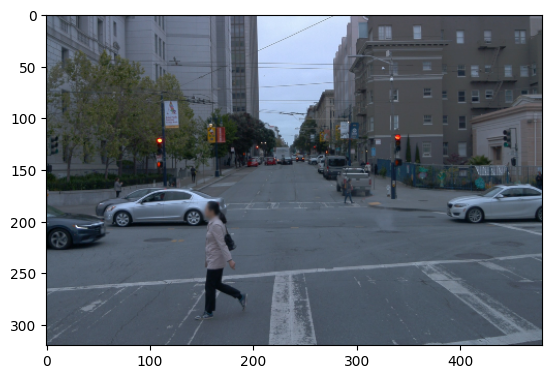

In [429]:
plt.imshow(rgb)

In [430]:
top_crop_rgb = np.array(rgb)[160:320, :]

True

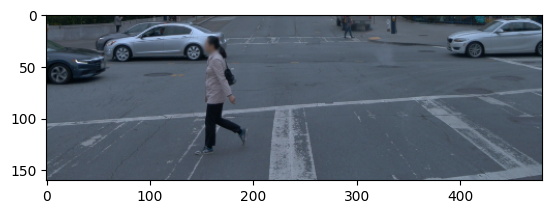

In [431]:
plt.imshow(top_crop_rgb)
cv2.imwrite('top_crop_rgb.png', cv2.cvtColor(top_crop_rgb, cv2.COLOR_RGB2BGR))

In [432]:
# Crop top of the camera_coord and points_set
def crop_pointcloud(points_set_or, camera_coord_or, i, j, h, w):
    points_set = np.copy(points_set_or)
    camera_coord = np.copy(camera_coord_or)

    camera_coord[:, 1] -= i
    camera_coord[:, 0] -= j
    selected_i = np.logical_and(
                        camera_coord[:, 1] >= 0, camera_coord[:, 1] < h)
    selected_j = np.logical_and(
                        camera_coord[:, 0] >= 0, camera_coord[:, 0] < w)
    selected = np.logical_and(selected_i, selected_j)
    points_set = points_set[selected, :]
    camera_coord = camera_coord[selected, :]

    return points_set, camera_coord, selected

In [433]:
top_crop_points_set, top_crop_camera_coord, _ = crop_pointcloud(
            points_set, camera_coord, 160, 0, 160, 480)

In [434]:
rgb_np = np.array(rgb)
rgb_zero = np.zeros([160,480,3], dtype=np.uint8)

In [435]:
x = np.zeros((160,480))
y = np.zeros((160,480))
z = np.zeros((160,480))

In [436]:
rows = np.floor(top_crop_camera_coord[:, 1])
cols = np.floor(top_crop_camera_coord[:, 0])

In [437]:
cmap = plt.cm.get_cmap('gray')
cmap = np.array([cmap(i) for i in range(256)])[:,:3] * 256

In [438]:
X = top_crop_points_set[:, 0]
for i in range(top_crop_camera_coord.shape[0]):
    X_norm = ((X[i]- X.min())/(X.max()-X.min())) * 255
    rows = np.floor(top_crop_camera_coord[i, 1])
    cols = np.floor(top_crop_camera_coord[i, 0])
    #print(rows, cols)
    x[int(rows), int(cols)] = X_norm

True

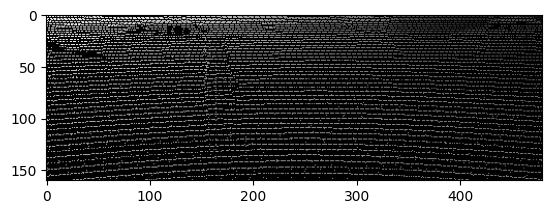

In [439]:
plt.imshow(x, cmap='gray')
cv2.imwrite('x.png', x)

In [440]:
Y = top_crop_points_set[:, 1]
for i in range(top_crop_camera_coord.shape[0]):
    Y_norm = ((Y[i]- Y.min())/(Y.max()-Y.min())) * 255
    #color = cmap[int(X_norm), :]
    #print(X_norm)
    rows = np.floor(top_crop_camera_coord[i, 1])
    cols = np.floor(top_crop_camera_coord[i, 0])
    #print(rows, cols)
    y[int(rows), int(cols)] = Y_norm

True

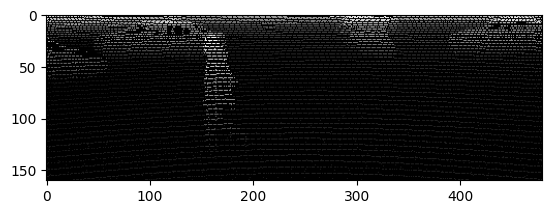

In [441]:
plt.imshow(y, cmap='gray')
cv2.imwrite('y.png', y)

In [442]:
Z = top_crop_points_set[:, 2]
for i in range(top_crop_camera_coord.shape[0]):
    Z_norm = ((Z[i]- Z.min())/(Z.max()-Z.min())) * 255
    #color = cmap[int(X_norm), :]
    #print(X_norm)
    rows = np.floor(top_crop_camera_coord[i, 1])
    cols = np.floor(top_crop_camera_coord[i, 0])
    #print(rows, cols)
    z[int(rows), int(cols)] = Z_norm

True

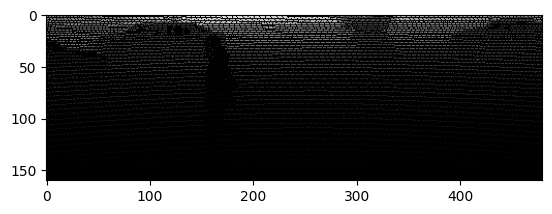

In [443]:
plt.imshow(z, cmap='gray')
cv2.imwrite('z.png', z)

In [444]:
x_cv = cv2.imread('./x.png')
kernel = np.ones((3, 3), np.uint8)
X_dilation = cv2.dilate(x_cv, kernel, iterations=1)

True

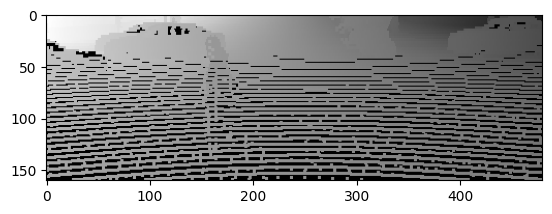

In [445]:
plt.imshow(X_dilation, cmap='gray')
cv2.imwrite('x_dil.png', X_dilation)

In [446]:
y_cv = cv2.imread('./y.png')
kernel = np.ones((3, 3), np.uint8)
Y_dilation = cv2.dilate(y_cv, kernel, iterations=1)

True

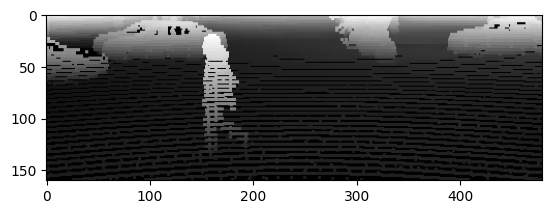

In [447]:
plt.imshow(Y_dilation, cmap='gray')
cv2.imwrite('y_dil.png', Y_dilation)

In [448]:
z_cv = cv2.imread('./z.png')
kernel = np.ones((3, 3), np.uint8)
Z_dilation = cv2.dilate(z_cv, kernel, iterations=1)

True

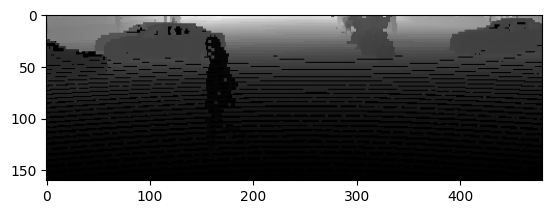

In [449]:
plt.imshow(Z_dilation, cmap='gray')
cv2.imwrite('z_dil.png', Z_dilation)